## VAE Procedure

In [146]:
import learning2read
from learning2read.b05 import *
Data = DataMgr(PATH_LOCAL['data'],verbose=1)

In [147]:
raw_train = Data('btrain')
raw_test = Data('btest')
raw_implicit = Data('implicit')
raw_user = Data('user')
raw_book = Data('book')
raw_dataset = {
    'raw_train' : raw_train,
    'raw_test' : raw_test,
    'raw_implicit' : raw_implicit,
    'raw_user' : raw_user,
    'raw_book' : raw_book,
}

~/Documents/mltechFinal/src/data/raw/book_ratings_train.csv
~/Documents/mltechFinal/src/data/raw/book_ratings_test.csv
~/Documents/mltechFinal/src/data/raw/implicit_ratings.csv
~/Documents/mltechFinal/src/data/raw/users.csv
~/Documents/mltechFinal/src/data/raw/books.csv


In [163]:
df_total = learning2read.preprocessing.TotalDataFrame.run([raw_train, raw_test, raw_implicit])['output']

In [164]:
df_train = preprocessingForVAE(df_total)

In [165]:
vae = learning2read.unsupervised.VariationalAutoEncoder(activation='SELU', code_length=16)

In [166]:
vae.fit(df_train, epochs=5)

Train Epoch: 1 [0/143511 (0%)]	Loss: 82.812233
Train Epoch: 1 [12800/143511 (9%)]	Loss: 6.728381
Train Epoch: 1 [25600/143511 (18%)]	Loss: 6.536848
Train Epoch: 1 [38400/143511 (27%)]	Loss: 6.765422
Train Epoch: 1 [51200/143511 (36%)]	Loss: 7.545188
Train Epoch: 1 [64000/143511 (45%)]	Loss: 6.707464
Train Epoch: 1 [76800/143511 (53%)]	Loss: 5.813765
Train Epoch: 1 [89600/143511 (62%)]	Loss: 6.610595
Train Epoch: 1 [102400/143511 (71%)]	Loss: 6.364374
Train Epoch: 1 [115200/143511 (80%)]	Loss: 8.316707
Train Epoch: 1 [128000/143511 (89%)]	Loss: 7.695175
Train Epoch: 1 [140800/143511 (98%)]	Loss: 6.568792
====> Epoch: 1 Average loss: 6.6095
Train Epoch: 2 [0/143511 (0%)]	Loss: 6.905066
Train Epoch: 2 [12800/143511 (9%)]	Loss: 5.586622
Train Epoch: 2 [25600/143511 (18%)]	Loss: 5.926130
Train Epoch: 2 [38400/143511 (27%)]	Loss: 5.535621
Train Epoch: 2 [51200/143511 (36%)]	Loss: 5.261861
Train Epoch: 2 [64000/143511 (45%)]	Loss: 7.174385
Train Epoch: 2 [76800/143511 (53%)]	Loss: 6.473823
Tr

In [168]:
import seaborn
code=vae.predict(df_train)
code_df=pd.DataFrame(code).iloc[:,:]

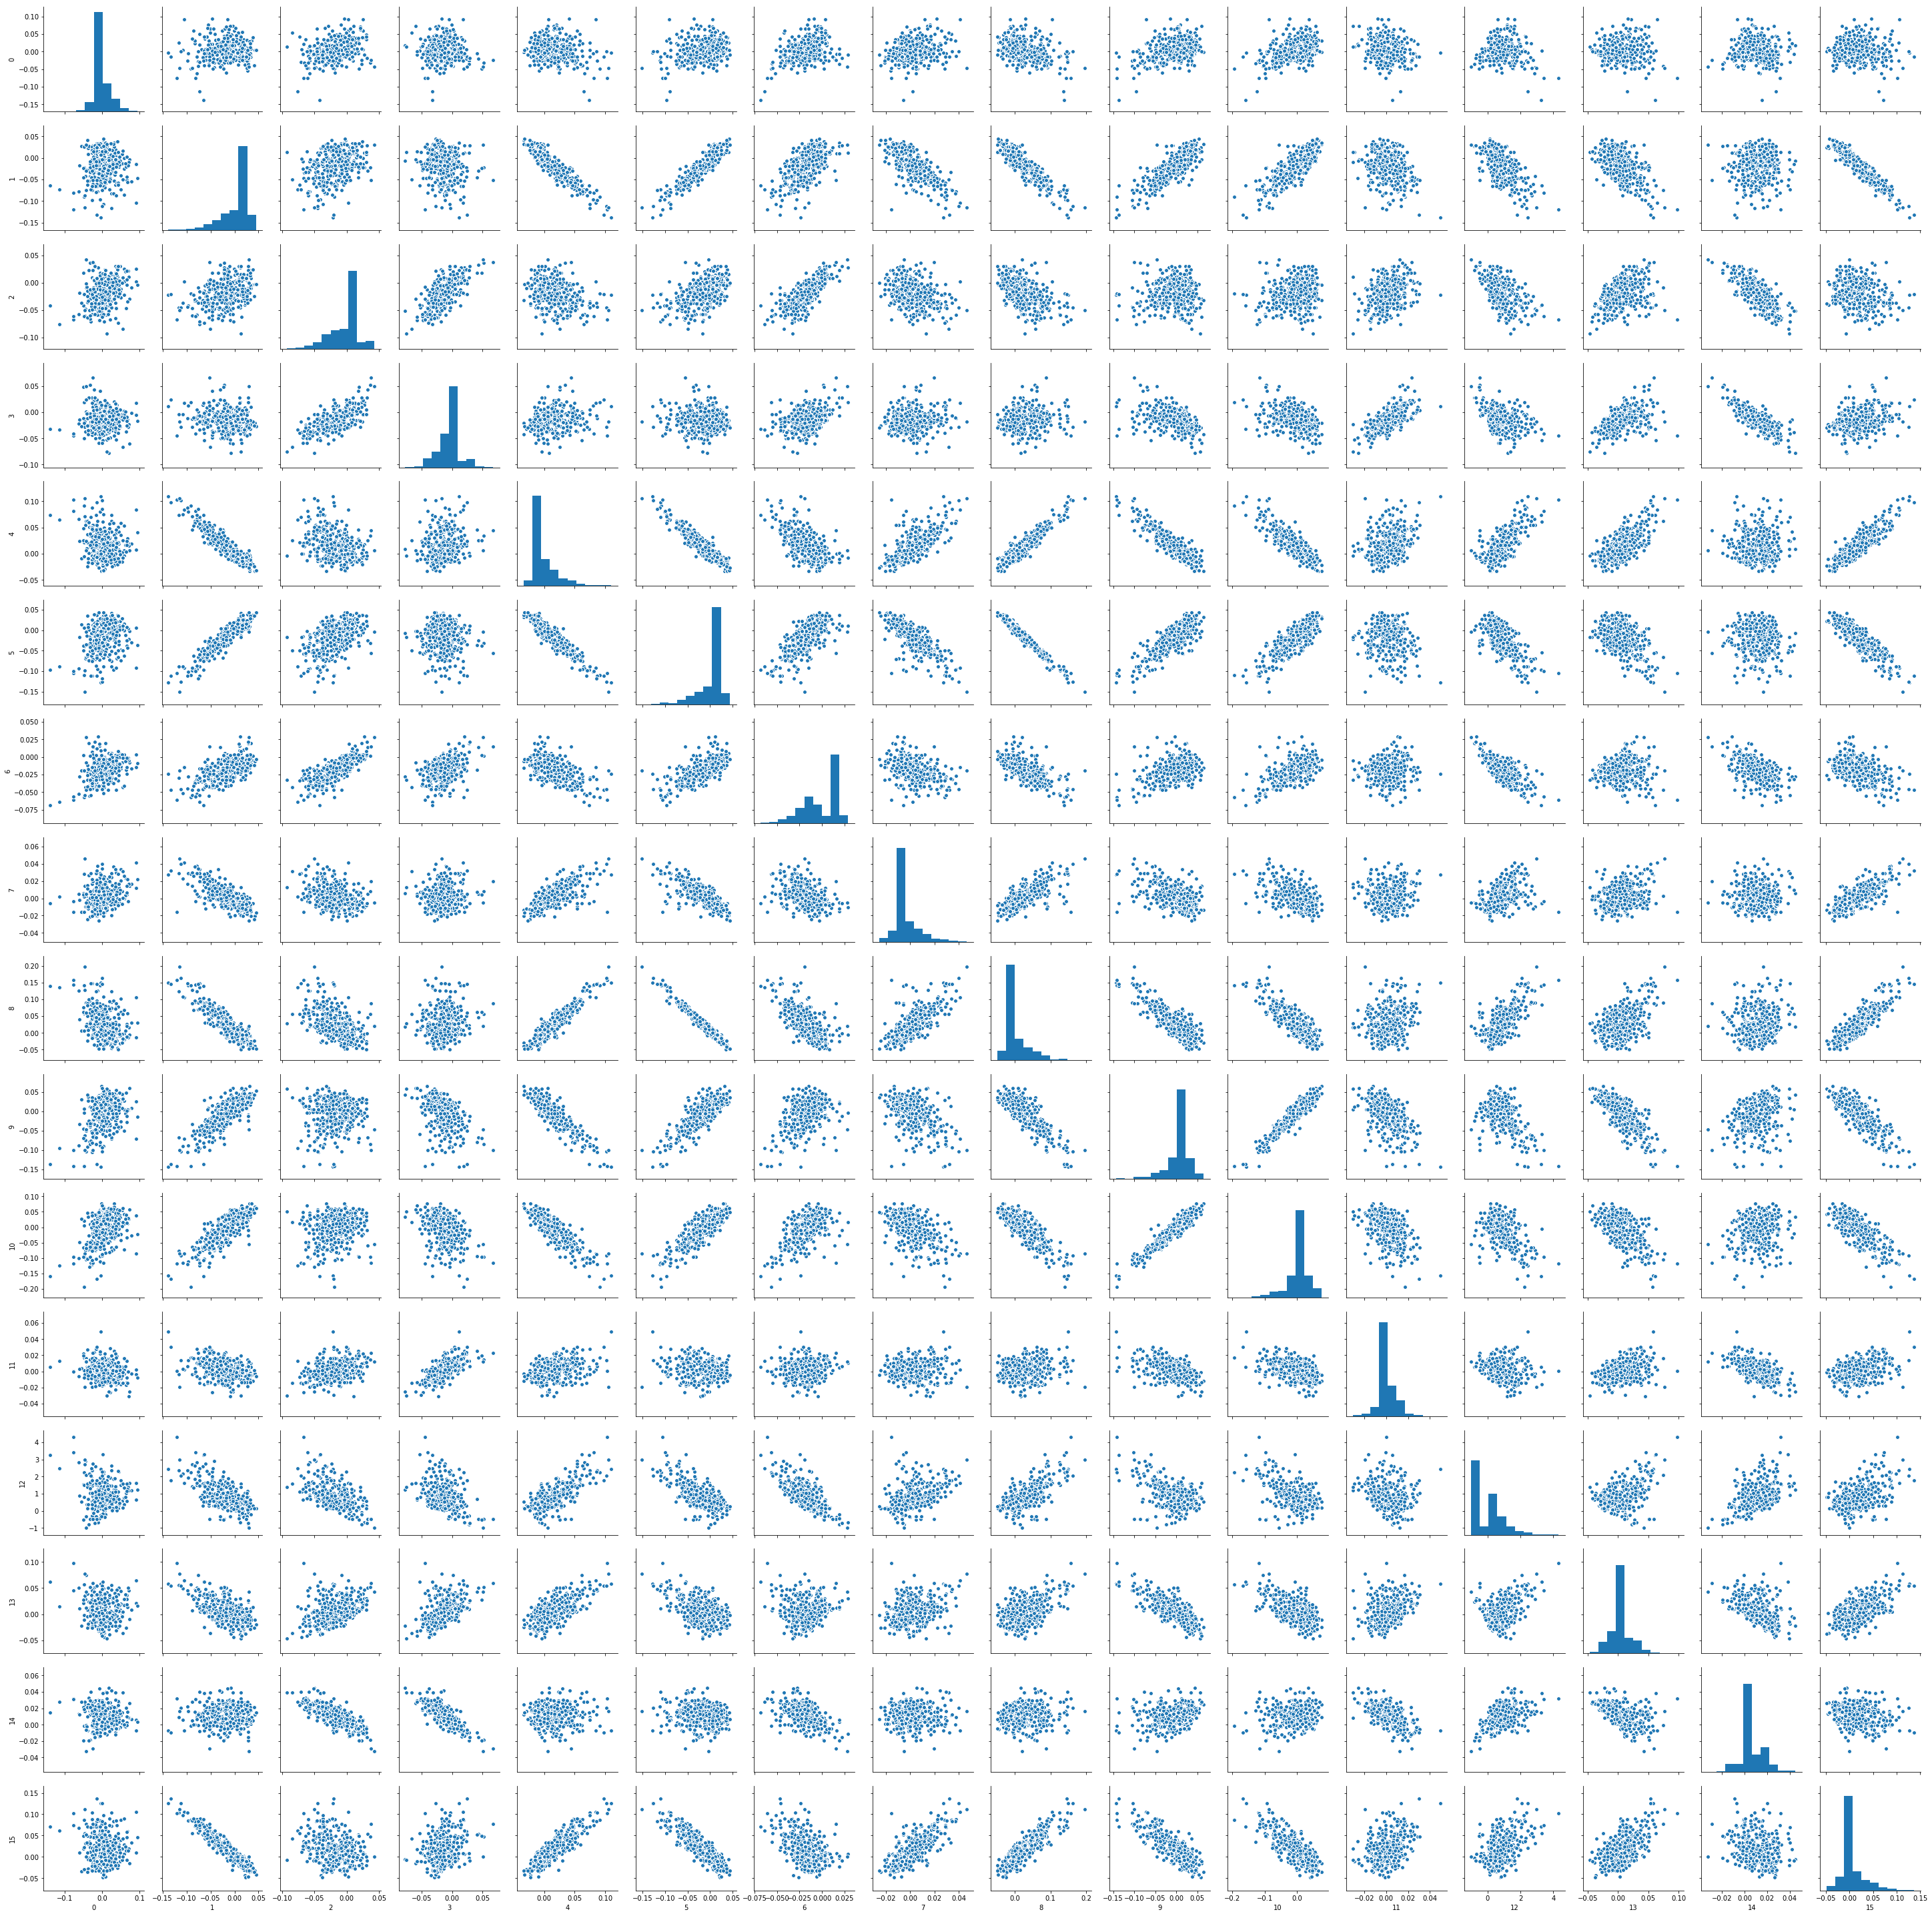

In [169]:
seaborn.pairplot(code_df.sample(1000))